# Monitor results

In [21]:
from exp import *

In [28]:
# results_file_name = 'segmentation_analysis_seed'
# columns = ['Baseline','Segmented','Baseline SOG','Segmented SOG']

# results_file_name = 'results/segmentation_analysis_seed'
# # columns = ['Baseline','Segmented','Baseline SOG','Segmented SOG']
# columns = ['Segmented']
# auroc_cols = []

# results_file_name = 'results/color_analysis_seed'
# columns = ['Baseline','Max RGB','Shades of Gray']

# results_file_name = 'results/resnet_50_arl_seed'
# columns = ['Baseline','ARL']

# results_file_name = 'results/efficientnet_attention_analysis_run_seed'
# columns = ['Baseline','Without SE', "Without SE and with ARL", "With Both"]

# results_file_name = 'ben_analysis_seed'
# columns = ['Baseline','ben_color_transform']

# results_file_name = 'results/hsv_analysis_seed'
# columns = ['Baseline','HSV']

# results_file_name = 'results/color_ben_analysis_seed'
# columns = ['Baseline','Max RGB','Shades of Gray', 'Ben Graham']

# results_file_name = 'results/third_take_resnet_50_arl_seed'
# columns = ['Baseline_acc','ARL_acc']
# auroc_cols = ['Baseline_auroc','ARL_auroc']

# results_file_name = 'results/second_take_efficientnet_attention_analysis_run_seed'
# columns = ['Baseline_acc','Without_SE_acc','without_SE_with_ARL_acc','SE_and_ARL_acc']
# auroc_cols = ['Baseline_auroc','Without_SE_auroc','without_SE_with_ARL_auroc','SE_and_ARL_auroc']


results_file_name = 'results/color_ben_analysis_seed_many_metrics'
columns = ['baseline_accuracies','max_rgb_accuracies','shades_of_gray_accuracies','ben_graham_accuracies']
auroc_cols = ['baseline_aurocs','max_rgb_aurocs','shades_of_gray_aurocs','ben_graham_aurocs']

In [38]:
i=2
df = pd.read_csv(f'{results_file_name}_{i}.txt'); df

,baseline_accuracies,baseline_aurocs,baseline_tp,baseline_tn,baseline_fp,baseline_fn,max_rgb_accuracies,max_rgb_aurocs,max_rgb_tp,max_rgb_tn,...,shades_of_gray_tp,shades_of_gray_tn,shades_of_gray_fp,shades_of_gray_fn,ben_graham_accuracies,ben_graham_aurocs,ben_graham_tp,ben_graham_tn,ben_graham_fp,ben_graham_fn
0,0.700000,0.753611,15,114,15,6,0.653333,0.694722,16,114,...,11,117,19,3,0.640000,0.690000,10,117,20,3
1,0.753333,0.683056,15,114,15,6,0.746667,0.742222,16,114,...,11,117,19,3,0.753333,0.765833,10,117,20,3
2,0.813333,0.704444,15,114,15,6,0.826667,0.771389,16,114,...,11,117,19,3,0.840000,0.747500,10,117,20,3
3,0.833333,0.779722,15,114,15,6,0.833333,0.784722,16,114,...,11,117,19,3,0.873333,0.798056,10,117,20,3
4,0.820000,0.778889,15,114,15,6,0.813333,0.810000,16,114,...,11,117,19,3,0.860000,0.791945,10,117,20,3
5,0.820000,0.810000,15,114,15,6,0.806667,0.800000,16,114,...,11,117,19,3,0.860000,0.798611,10,117,20,3
6,0.826667,0.817222,15,114,15,6,0.813333,0.819722,16,114,...,11,117,19,3,0.866667,0.802222,10,117,20,3
7,0.860000,0.843611,15,114,15,6,0.813333,0.814444,16,114,...,11,117,19,3,0.846667,0.805833,10,117,20,3
8,0.840000,0.855278,15,114,15,6,0.813333,0.817778,16,114,...,11,117,19,3,0.826667,0.778333,10,117,20,3
9,0.833333,0.849167,15,114,15,6,0.820000,0.809444,16,114,...,11,117,19,3,0.866667,0.830000,10,117,20,3


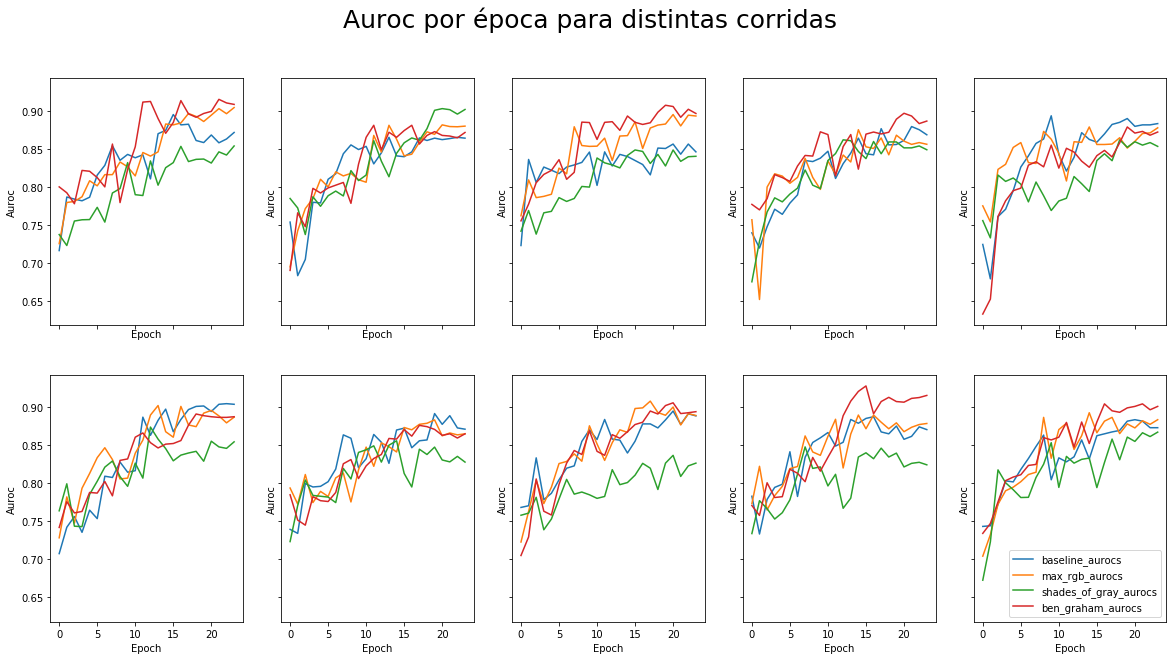

In [43]:
runs = {}
baseline = {}
fig, axs = plt.subplots(2,5, figsize=(20,10), sharey=True, sharex=True)

plottearAccuracy = False
metric = 'Accuracy' if plottearAccuracy else 'Auroc'
fig.suptitle(f'{metric} por época para distintas corridas', fontsize=25)

for i in range(1,11):
#     baseline[i] = pd.read_csv(f'results/resnet_50_arl_seed_{i}.txt').Baseline
    runs[i] = pd.read_csv(f'{results_file_name}_{i}.txt')
#     runs[i]['Baseline'] = pd.read_csv(f'results/resnet_50_arl_seed_{i}.txt').Baseline
#     print(runs[i])
#     del runs[i]['Baseline SOG']
#     del runs[i]['Segmented SOG']
#     print(runs[i])

    for col in df.columns:
        if plottearAccuracy:
            if col not in columns:
                del runs[i][col]
        else:
            if col not in auroc_cols:
                del runs[i][col]
            
            
    ax = axs[(i-1) // 5 , (i-1) %5]
    ax.plot(runs[i])
    ax.set_xlabel('Epoch')
    ax.set_ylabel(metric)

#     runs[i].plot()
plt.legend(runs[i].columns)


In [44]:
columnsToPlot = columns if plottearAccuracy else auroc_cols

max_dicc = {col: [runs[r].max()[col] for r in runs] for col in columnsToPlot }

max_dicc

{'baseline_aurocs': [0.8952776789665222,
  0.8652776479721069,
  0.856389045715332,
  0.879444420337677,
  0.8936111330986023,
  0.9050001502037048,
  0.8919444680213928,
  0.8952777981758118,
  0.8877777457237244,
  0.8838887214660645],
 'max_rgb_aurocs': [0.904444456100464,
  0.8816668391227722,
  0.8952779769897461,
  0.8752777576446533,
  0.8788889646530151,
  0.9025000929832458,
  0.8836110830307007,
  0.908333420753479,
  0.89000004529953,
  0.8930555582046509],
 'shades_of_gray_aurocs': [0.8538889288902283,
  0.9030555486679076,
  0.8486112356185913,
  0.8619444966316223,
  0.8619444966316223,
  0.8741666674613953,
  0.8561111688613892,
  0.8369443416595459,
  0.8480556607246399,
  0.8675001263618469],
 'ben_graham_aurocs': [0.9152779579162598,
  0.8811112642288208,
  0.907500147819519,
  0.8969443440437317,
  0.8788890242576599,
  0.8913889527320862,
  0.8763889074325562,
  0.9061112403869628,
  0.9283334612846376,
  0.9047223925590516]}

In [45]:
df = pd.DataFrame(max_dicc)

In [46]:
def highlight_max(s):
    '''
    bold the maximum in a Series.
    '''
    is_max = s == s.max()
    return ['font-weight: bold' if v else '' for v in is_max]

In [47]:
df.describe().transpose().style.apply(highlight_max)

,count,mean,std,min,25%,50%,75%,max
baseline_aurocs,10.000000,0.885389,0.014831,0.856389,0.880555,0.889861,0.894861,0.905000
max_rgb_aurocs,10.000000,0.891306,0.011410,0.875278,0.882153,0.891528,0.900695,0.908333
shades_of_gray_aurocs,10.000000,0.861222,0.018135,0.836944,0.849931,0.859028,0.866111,0.903056
ben_graham_aurocs,10.000000,0.898667,0.016924,0.876389,0.883681,0.900833,0.907153,0.928333


# Alphas for ARL

## Resnet-50

In [14]:
alphas = np.loadtxt("results/alphas.txt").reshape(16, 4060)


/home/mike/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: loadtxt: Empty input file: "results/alphas.txt"
  """Entry point for launching an IPython kernel.


ValueError: cannot reshape array of size 0 into shape (16,4060)

NameError: name 'alphas' is not defined

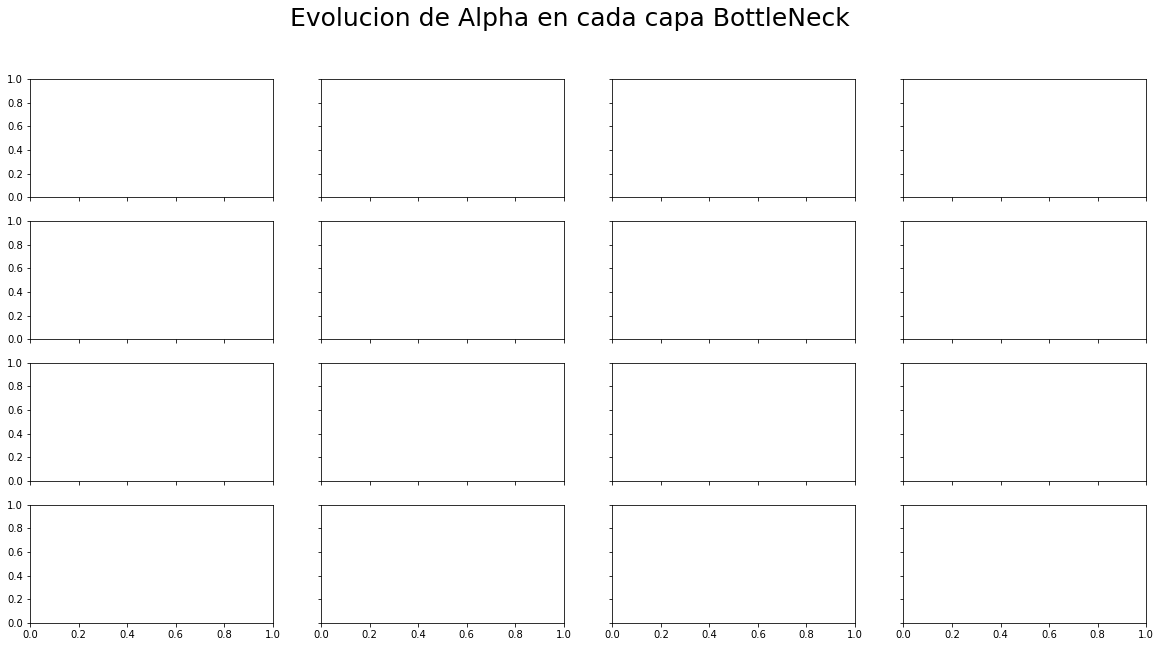

In [15]:
fig,axs = plt.subplots(4,4, figsize=(20,10), sharey=True, sharex=True)
fig.suptitle('Evolucion de Alpha en cada capa BottleNeck', fontsize=25)
batches_per_epoch_with_oversampling = 203 #bs=16
epochs = 20 
for i in range(len(original_array)):
    ax = axs[(i-1) // 4, (i-1) % 4]    
    ax.plot(alphas[i])
    forward_passes = alphas[i];
    x_ticks_positions = [batches_per_epoch_with_oversampling * i for i in range(len(forward_passes))][:epochs+1][0::2]
    x_ticks_labels = list(range(epochs+1))[0::2]
    ax.set_xticks(x_ticks_positions) 
    ax.set_xticklabels(x_ticks_labels) 

    ax.set_xlabel('Epoch')
    ax.set_ylabel('Valor')
    

## EfficientNet

In [10]:
real_alphas = np.loadtxt("results/alphas_efficientnet.txt").reshape(9, 4060)


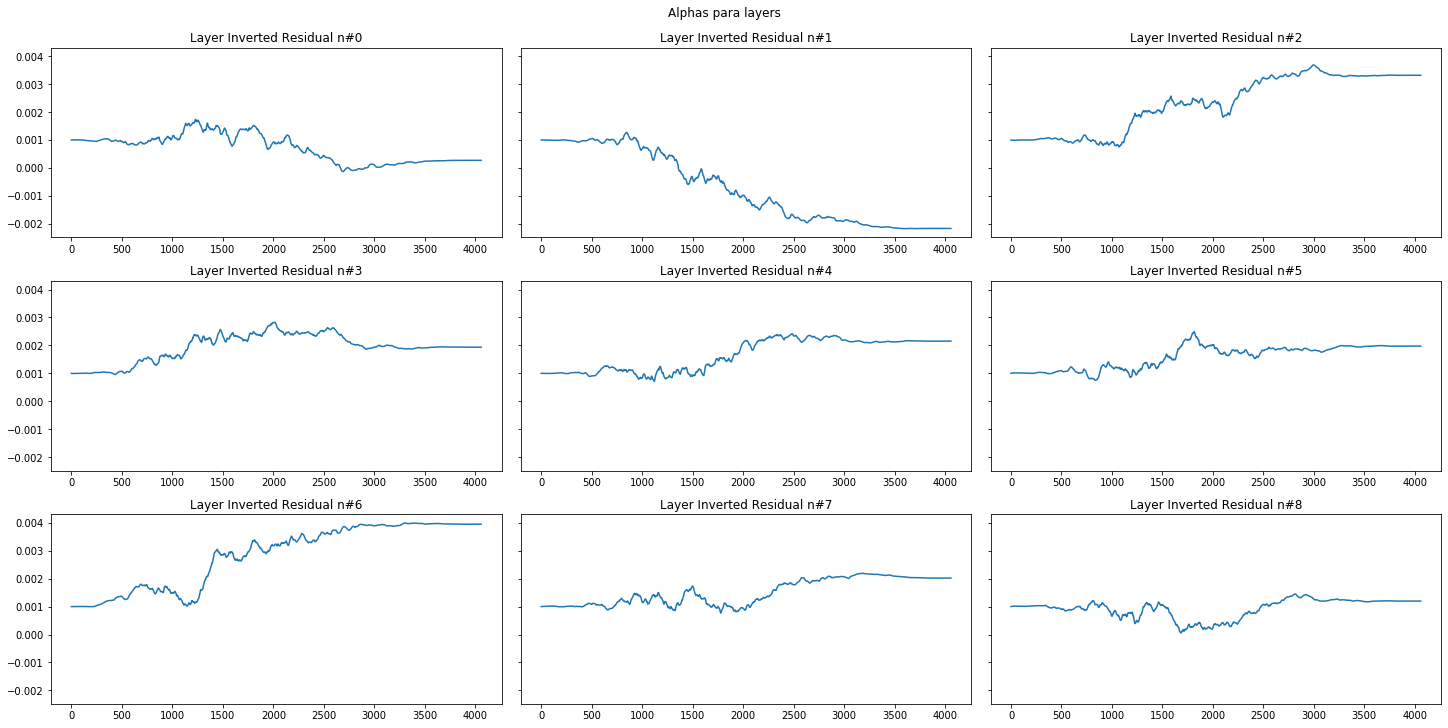

In [11]:
fig,axs = plt.subplots(3,3,figsize=(20,10), constrained_layout=True, sharey=True)

fig.suptitle('Alphas para layers')

for i in range(9):
    axs[i//3][i%3].set_title(f"Layer Inverted Residual n#{i}")
    axs[i//3][i%3].plot(real_alphas[i])
    